# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [545]:
%matplotlib inline
import pandas as pd
import numpy as np
from xml.etree import ElementTree as ET
from xml.etree.ElementTree import Element
from xml.etree.ElementTree import SubElement

## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [546]:
document_tree = ET.parse('./data/mondial_database_less.xml')
root = document_tree.getroot()


In [547]:
# print names of all countries
for country in root.findall('country'):
    country_name = country.find('name').text
    print (country_name)  

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [548]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    cities = ''
    for subelement in element.iter('city'):
        cities += subelement.find('name').text + ', '
    print ('* ' + element.find('name').text + ' : ' + cities[:-2])
   
        


* Albania : Tirana, Shkodër, Durrës, Vlorë, Elbasan, Korçë
* Greece : Komotini, Kavala, Athina, Peiraias, Peristeri, Acharnes, Patra, Kozani, Kerkyra, Ioannina, Thessaloniki, Iraklio, Chania, Ermoupoli, Rhodes, Tripoli, Lamia, Chalkida, Larissa, Volos, Mytilini, Karyes
* Macedonia : Skopje, Kumanovo
* Serbia : Beograd, Novi Sad, Niš
* Montenegro : Podgorica
* Kosovo : Prishtine
* Andorra : Andorra la Vella


****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [549]:
document = ET.parse( './data/mondial_database.xml' )

In [550]:
# Defining top 10 countries with the lowes infant mortality rate
# First lets set up an empty dictionry for the futher use
imDict = dict()

# Now lets iterate the document for each country element
for element in document.iterfind('country'):
    
# Itearate the each element for infant mortality subelement
    for subelement in element.iter('infant_mortality'):
        
# Assigning infant mortality values to country keys in the dictionary
        imDict[element.find('name').text] = subelement.text
        
    
# Forming a data frame with keys(Countries) to be indexes of the data frame
imDF = pd.DataFrame.from_dict(imDict, orient = 'index')
imDF.columns = ['infant_mortality']
imDF.index.names = ['country']

# Sorting values to find top 10 lowest values
topT = imDF.sort_values(by = 'infant_mortality', ascending = True).head()
topT
        
    
       

    


,infant_mortality
country,
Monaco,1.81
Romania,10.16
Fiji,10.2
Brunei,10.48
Grenada,10.5


In [551]:
# Finding top 10 most populated cities

# Initializing varables and dictionary for the further use
latestYear = 0
population = 0
popDict = dict()

# Iterating document for each city -> country/city element
for element in document.iterfind('country/city'):
    
# Iterating city element for population subelement
    for subelement in element.iter('population'):

# The XML file has different population values for city splited by year attribute.
# In our analysis we will be looking for the latest year for which population figure is available

# Setting up condition which tracks if the subelement`s year attribute has the biggest value among subelement`s year attributes
# When the condition is passed assigning variables to the corresponding values
        if int(subelement.attrib['year']) > latestYear:
            latesYear = int(subelement.attrib['year'])
            population = int(subelement.text)
            
# Forming 'City':population dictionary    
    popDict[element.find('name').text] = population

# Resetting variables values, so that they won`t interfer in the next loop
    latestYear = 0
    population = 0
    
    print (popDict)
    
        

{'Tirana': 418495}
{'Shkodër': 77075, 'Tirana': 418495}
{'Shkodër': 77075, 'Tirana': 418495, 'Durrës': 113249}
{'Shkodër': 77075, 'Tirana': 418495, 'Vlorë': 79513, 'Durrës': 113249}
{'Shkodër': 77075, 'Tirana': 418495, 'Vlorë': 79513, 'Elbasan': 78703, 'Durrës': 113249}
{'Shkodër': 77075, 'Tirana': 418495, 'Elbasan': 78703, 'Durrës': 113249, 'Vlorë': 79513, 'Korçë': 51152}
{'Shkodër': 77075, 'Tirana': 418495, 'Elbasan': 78703, 'Durrës': 113249, 'Skopje': 514967, 'Vlorë': 79513, 'Korçë': 51152}
{'Kumanovo': 107745, 'Shkodër': 77075, 'Tirana': 418495, 'Elbasan': 78703, 'Durrës': 113249, 'Skopje': 514967, 'Vlorë': 79513, 'Korçë': 51152}
{'Kumanovo': 107745, 'Shkodër': 77075, 'Tirana': 418495, 'Elbasan': 78703, 'Durrës': 113249, 'Skopje': 514967, 'Beograd': 1639121, 'Vlorë': 79513, 'Korçë': 51152}
{'Kumanovo': 107745, 'Shkodër': 77075, 'Novi Sad': 335701, 'Tirana': 418495, 'Elbasan': 78703, 'Durrës': 113249, 'Skopje': 514967, 'Beograd': 1639121, 'Vlorë': 79513, 'Korçë': 51152}
{'Kumanovo':

In [552]:
# Creating a data frane with setting cities as n index
cpDf = pd.DataFrame.from_dict(popDict, orient = 'index')

# Re-naming columns
cpDf.columns = ['population']
cpDf.index.names = ['cities']
cpDf.sort_values(by = 'population').head()   

# As we can see some cities which do not have population data in the XML file returned 0 in th data frame

,population
cities,
Noumea,0
Pago Pago,0
Hurghada,0
Avarua,0
Saipan,0


In [553]:
# Filtering cities with no population data

cpDf[cpDf.population != 0].sort_values(by = 'population').head()

,population
cities,
Melekeok,391
Fakaofo,490
Vatican City,842
Monaco,975
Philipsburg,1338


In [554]:
# Finding to 10 populated cities in the data set
cpDf[cpDf.population != 0].sort_values(by = 'population', ascending = False).head(10)

,population
cities,
Seoul,9708483
Al Qahirah,8471859
Bangkok,7506700
Hong Kong,7055071
Ho Chi Minh,5968384
Singapore,5076700
Al Iskandariyah,4123869
New Taipei,3939305
Busan,3403135


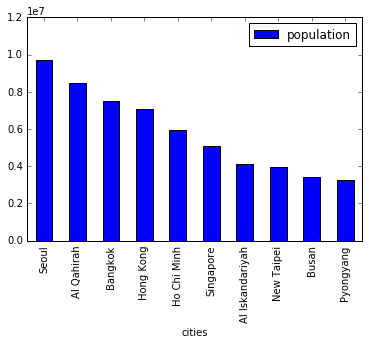

In [555]:
cpDf[cpDf.population != 0].sort_values(by = 'population', ascending = False).head(10).plot(ylim = (0, 1.2e7), kind = 'bar')

In [556]:
ethDict = dict()
ethPop = 0
yearPop = 0

for element in document.iterfind('country'):
    
    for subelement in element.iter('population'):
        if int(subelement.attrib['year']) > yearPop:
            yearPop = int(subelement.attrib['year'])
            ethPop = int(subelement.text)        
    print (yearPop, ethPop, element.find('name').text)
    print('------------------------------------------')
    
    for subelement in element.iter('ethnicgroup'):
        nationPop = round(ethPop * float(subelement.attrib['percentage'])/100)
        
        print(subelement.text, nationPop)

        
    
        ethDict[subelement.text] =+ nationPop # ???
   
    yearPop = 0
    ethPop = 0
    


2011 2800138 Albania
------------------------------------------
Albanian 2660131
Greek 84004
2014 233 Greece
------------------------------------------
Greek 217
2011 2059794 Macedonia
------------------------------------------
Macedonian 1322388
Albanian 519068
Turkish 80332
Gypsy 55614
Serb 37076
2011 7120666 Serbia
------------------------------------------
Serb 5903032
Montenegrin 64086
Hungarian 277706
Roma 99689
Bosniak 128172
Croat 78327
2011 620029 Montenegro
------------------------------------------
Montenegrin 266612
Serb 198409
Bosniak 49602
Albanian 31001
2011 1733872 Kosovo
------------------------------------------
Albanian 1595162
Serbian 86694
2011 78115 Andorra
------------------------------------------
Spanish 33589
Andorran 25778
Portuguese 8593
French 1562
African 3906
2011 64933400 France
------------------------------------------
2011 46815916 Spain
------------------------------------------
Mediterranean Nordic 46815916
2013 8499759 Austria
---------------------

In [557]:
print (ethDict)

{'Kyrgyz': 3749013, 'Jewish': 109828, 'Bilen': 114823, 'Kisii': 2454552, 'Greek': 647113, 'African': 1157354, 'Euronesians': 13147, 'Azerbaijani': 18035921, 'Bete': 4080840, 'Portuguese': 16575, 'Arab-Berber': 10763099, 'Italian': 41702, 'Malay': 756428, 'Tay': 1686685, 'Kazakh': 10831266, 'Maori': 313912, 'Bagisu': 1742841, 'Moldovan': 228168, 'Luhya': 5727287, 'Baloch': 1502993, 'Mboum': 173997, 'Micronesian': 7897, 'Mongol': 2614196, 'Ukrainian': 57766, 'Arab': 348568, 'Inuit': 703166, 'Tigre': 1722348, 'Indo-Aryan': 871815583, 'Acholi': 1394273, 'Kikuyu': 9000023, 'Finn': 477795, 'Yezidi': 39349, 'Lao Loum': 4429814, 'Fijian': 421674, 'Batswana': 1936317, 'Serer': 2296482, 'Scandinavian': 48197, 'Chuvash': 1580336, 'Hausa': 9597676, 'Nepalese': 256551, 'Greenlander': 48478, 'Amerindian': 3620875, 'Nung': 976502, 'Russian Ukrainian': 829, 'Franco-Mauritian': 24742, 'Irish': 4010132, 'Celt': 318452, 'Tigrinya': 3157637, 'Caucasian': 970, 'Borneo indigenous': 3032240, 'Sundanese': 352

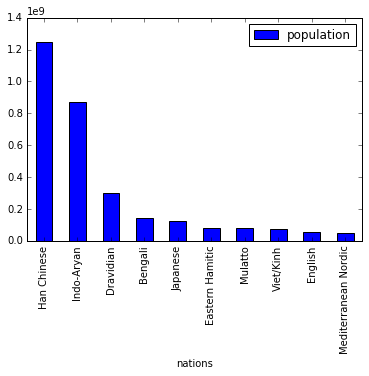

In [558]:
nationsDf = pd.DataFrame.from_dict(ethDict, orient = 'index')

nationsDf.columns = ['population']
nationsDf.index.names = ['nations']
nationsDf[nationsDf.population != 0].dropna().sort_values(by = 'population', ascending = False).head(10).plot(kind = 'bar')

In [559]:
nationsDf[nationsDf.index == 'Albanian'] # Question example

,population
nations,
Albanian,1595162


In [667]:
riverLength = 0
lakeArea = 0
aElev = 0
country = None
riverName = None
lakeName = None


for element in document.iterfind('river'):
    for subelement in element.iterfind('length'):
        if riverLength < float(subelement.text):
            riverLength = float(subelement.text)
            riverCountry = element.attrib['country']
            riverName = element.find('name').text
print ('The longest river: ',riverCountry, riverName, riverLength)

for element in document.iterfind('lake'):
    for subelement in element.iterfind('area'):
        if lakeArea < float(subelement.text):
            lakeArea = float(subelement.text)
            lakeCountry = element.attrib['country']
            lakeName = element.find('name').text
print ('The largest lake: ', lakeCountry, lakeName, lakeArea)
            
for element in document.iterfind('airport'):
    for subelement in element.iterfind('elevation') :
        if(subelement.text != None):
            subelement = subelement
        if aElev < int(subelement.text):
            aElev = int(subelement.text)
            aCountry = element.attrib['country']
            aName = element.find('name').text
        
            print (aElev, aCountry, aName)

        
    
    
    
    
    
 

The longest river:  CO BR PE Amazonas 6448.0
The largest lake:  R AZ KAZ IR TM Caspian Sea 386400.0
977 AFG Herat
1792 AFG Kabul Intl
2235 BHT Paro
4063 BOL El Alto Intl


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'